[Home](https://elvinado.github.io/)

# K-Means-Simulation

Source can be found in [https://github.com/elvinado/K-Means-Simulation](https://github.com/elvinado/K-Means-Simulation)

## Learning Points

- Learning step-by-step how K-Means Clustering works
- Self-written algorithm (not copied from the internet)
- Learn more on matplotlib visualization

## Caveat
- I did not generalize for more than 2D
- Assumption that there are 3 clusters
- This is a very dirty code. More cleaning and factorization need to be done in the future.

In [1]:
from random import seed
from random import randint
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Function to generate random normal distributed 2D coordinates

In [2]:
def my_list(mx,my,sx,sy,n):
    # mx, my are coordinates of mean
    # sx, sy are coordinates size
    # n is size of population
    x = np.random.normal(mx,sx,n).tolist()
    y = np.random.normal(my,sy,n).tolist()
    return x,y

### Function to generate random initial sets of centroids

In [3]:
def my_centroids(x,y,k):
    i,j = [],[]
    for _ in range(k): 
        i.append(randint(round(min(x)),round(max(x))))
        j.append(randint(round(min(y)),round(max(y))))

    return pd.DataFrame(zip(i,j),columns=["X","Y"])

### Function to calculate distance between a centroid to all data points

In [4]:
# calculate distance A to all
def cent_dist(centroid,df):
    cent_x = centroid["X"]
    cent_y = centroid["Y"]
    x = df["X"].values
    y = df["Y"].values
    return np.sqrt((cent_x - x)**2 + (cent_y - y)**2)

### Function to update centroid index in df

In [5]:
def update_cent(centroids,df):
    distances = []
    for i in range(len(centroids)):
        distances.append(cent_dist(centroids.iloc[i],df))

    distances = np.array(distances)
    df["Centroid"] = np.argmin(distances, axis=0) # using argmin to get the index of the smallest distance

### Function to recalculate new location for centroid based on mean of the new cluster

In [6]:
def recalculate_cent_update(centroids,df):
    # Recalculate centroid and update
    for i in range(len(centroids)):
        df[df["Centroid"] == i][["X","Y"]]
        centroids.iloc[i] = np.mean(df[df["Centroid"] == i][["X","Y"]])

### Function to plot the newly clustered data

In [7]:
def plot_scatter(centroids,df,title):
    # plot new 
    color = ['b','g','r']
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(1,1,1)
#     title = f"{title}"
    for i,c in zip(range(len(centroids)),color):
        ax.scatter(df[df["Centroid"] == i]["X"],df[df["Centroid"] == i]["Y"], c=c, marker='o')
        ax.scatter(centroids.iloc[i]["X"],centroids.iloc[i]["Y"], c='black', marker='d',s = 500)
        ax.set_xlim(0,80)
        ax.set_ylim(0,80)
        title = title + f"\nK:{i} --> ({int(centroids.iloc[i]['X'])},{int(centroids.iloc[i]['Y'])})"
    ax.set_title(title)
    plt.show()

### Function to generate dataframe of dummy datapoints

In [8]:
def my_df():
    c1 = my_list(50,50,8,4,50) # generate first pseudo cluster
    c2 = my_list(65,20,4,7,100) # generate second pseudo cluster
    c3 = my_list(35,30,7,3,150) # generate third pseudo cluster
    x = c1[0] + c2[0] + c3[0] # combine into one list
    y = c1[1] + c2[1] + c3[1]
    #to simplify things use dataframe
    ce = np.zeros(len(x)) # all centroid initialized as zero
    # plot initial data
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(c1[0],c1[1], c='r', marker='o')
    ax.scatter(c2[0],c2[1], c='g', marker='x')
    ax.scatter(c3[0],c3[1], c='b', marker='d')
    ax.set_xlim(0,80)
    ax.set_ylim(0,80)
    plt.show()
    return pd.DataFrame(zip(x,y,ce),columns=["X","Y","Centroid"])

### Initialize dummy data

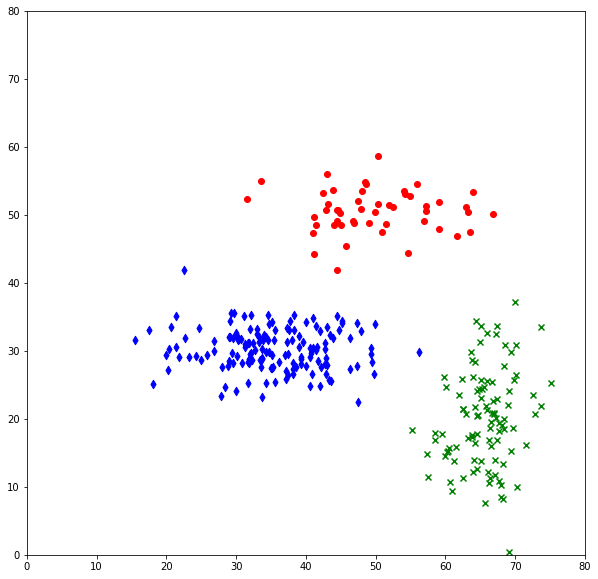

In [9]:
np.random.seed(1) # to make sure result always the same
df = my_df()

### Initialize k number and centroids

In [10]:
k = 3 # initialize k number
seed(1) # to ensure always get the same result
centroids = my_centroids(df["X"].values,df["Y"].values,k)

### Run the k-mean clustering algorithm

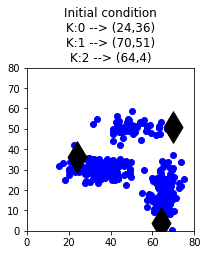

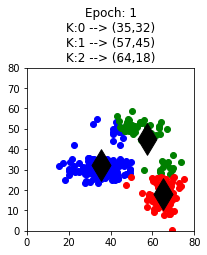

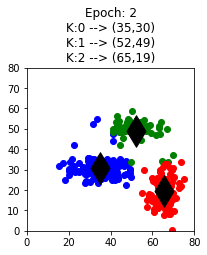

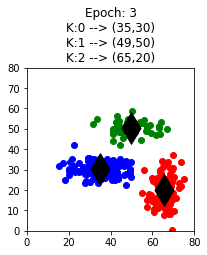

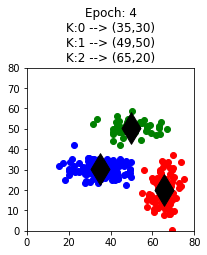

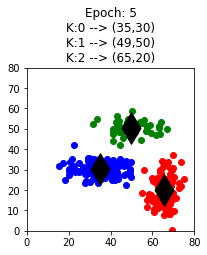

In [11]:
epoch = 5
plot_scatter(centroids,df,"Initial condition") # plot first cluster
for i in range(epoch):
    update_cent(centroids,df)
    recalculate_cent_update(centroids,df)
    plot_scatter(centroids,df,f"Epoch: {i+1}")